# Predator - Prey Model

In [2]:
import matplotlib.pyplot as plt
import numpy as np

u = u + ((a * u) - (b * u * v) ) * dt

v = v + ( (-c * v) + (d * u * v) ) * dt 

## Model

In [4]:
def model(u = 1, v = 0.5, a = 0.7, b = 0.5, c = 0.3, d = 0.2, dt = 1e-3, stop_time = 100):
    
    t = 0
    
    list_u = [u]
    list_v = [v]
    list_t = [t]
    
    while t < stop_time:
        
        t = t + dt # t += dt
        
        u = u + ((a * u) - (b * u * v) ) * dt
        if u < 0:
            u = 0
        
        v = v + ( (-c * v) + (d * u * v) ) * dt
        
        if v < 0:
            
            v = 0
            
            if u == 0 and v == 0:
                list_t.append(t)
                list_u.append(u)
                list_v.append(v)
                break
        
        
        list_t.append(t)
        list_u.append(u)
        list_v.append(v)
        
    return list_u , list_v, list_t  
    

In [13]:
def plot_population(l):
    
    u, v , t = l
    
    plt.plot(t, u, label = "Prey")
    plt.plot(t, v , label = "Predator")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Population over Time")

    plt.legend(loc = "upper right")

    plt.show()
    
    

In [16]:
def model(u = 1, v = 0.5, a = 0.7, b = 0.5, c = 0.3, d = 0.2, dt = 1e-3, stop_time = 100):
    
    t = 0
    
    list_u = [u]
    list_v = [v]
    list_t = [t]
    
    while t < stop_time:
        
        t = t + dt # t += dt
        
        u = u + ((a * u) - (b * u * v) ) * dt
        if u < 0:
            u = 0
        
        v = v + ( (-c * v) + (d * u * v) ) * dt
        
        if v < 0:
            
            v = 0
            
            if u == 0 and v == 0:
                list_t.append(t)
                list_u.append(u)
                list_v.append(v)
                break
        
        
        list_t.append(t)
        list_u.append(u)
        list_v.append(v)
        
    plt.plot(list_t, list_u, label = "Prey")
    plt.plot(list_t, list_v , label = "Predator")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Population over Time")

    plt.legend(loc = "upper right")

    plt.show()  
    

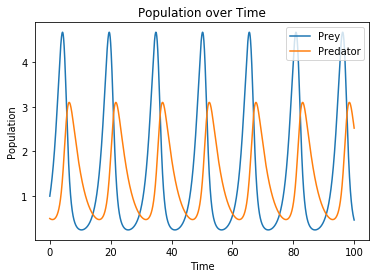

In [23]:
model()

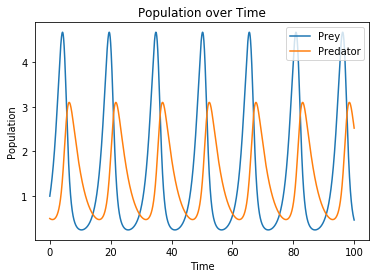

In [14]:
plot_population(model())

In [43]:
def disaster(u, v):
    return 0.01 * u, 0.01 * v

## Event Model

In [162]:
def model(u = 1, v = 0.5, a = 0.7, b = 0.5, c = 0.3, d = 0.2, dt = 1e-3, stop_time = 100, event_func = None, event_time = 50):
    
    t = 0
    
    list_u = [u]
    list_v = [v]
    list_t = [t]

    event_control = True
    
    while t < stop_time:
        
        if event_func and t > event_time and event_control:
            u, v = event_func(u, v)
            event_control = False
        
        t = t + dt # t += dt
        
        u = u + ((a * u) - (b * u * v) ) * dt
        if u < 0:
            u = 0
        
        v = v + ( (-c * v) + (d * u * v) ) * dt
        
        if v < 0:
            
            v = 0
            
            if u == 0 and v == 0:
                list_t.append(t)
                list_u.append(u)
                list_v.append(v)
                break
        
        
        list_t.append(t)
        list_u.append(u)
        list_v.append(v)
        
    return list_u, list_v, list_t  
    

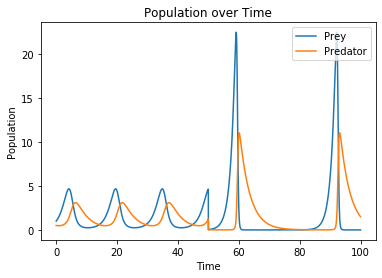

In [163]:
plot_population(model(event_func = disaster))

In [46]:
def migration_prey(u, v):
    return u * 1.5, v

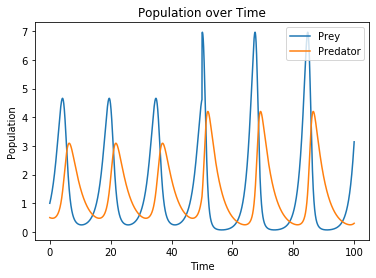

In [47]:
plot_population(model(event_func = migration_prey))

In [52]:
def migration_pred(u, v):
    return u , v * 1.5

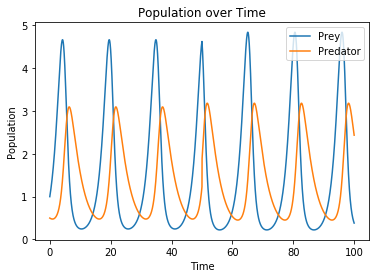

In [53]:
plot_population(model(event_func = migration_pred))

In [54]:
def event(u,v):
    return u * 0.2, v * 1.2

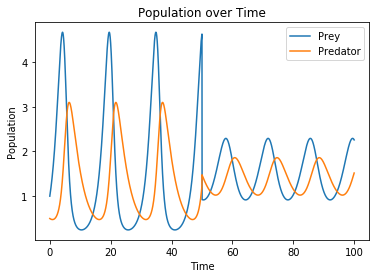

In [55]:
plot_population(model(event_func = event))

In [56]:
import random

In [150]:
n = 1000
c = 0
for i in range(n):
    
    x = random.random()
    
    if x > 0.9:
        c += 1
        
c / n


0.112

## Probabilistic Event Model

In [188]:
def model(u = 1, v = 0.5, a = 0.7, b = 0.5, c = 0.3, d = 0.2, dt = 1e-3, stop_time = 100, event_func = None, event_time = 50):
    
    t = 0
    
    list_u = [u]
    list_v = [v]
    list_t = [t]

    
    while t < stop_time:
        
        p = random.random()
        
        if event_func and p > 0.9992:
            u, v = event_func(u, v)
        
        t = t + dt # t += dt
        
        u = u + ((a * u) - (b * u * v) ) * dt
        if u < 0:
            u = 0
        
        v = v + ( (-c * v) + (d * u * v) ) * dt
        
        if v < 0:
            
            v = 0
            
            if u == 0 and v == 0:
                list_t.append(t)
                list_u.append(u)
                list_v.append(v)
                break
        
        
        list_t.append(t)
        list_u.append(u)
        list_v.append(v)
        
    return list_u, list_v, list_t  
    

In [189]:
len(model(event_func = event)[2])

100001

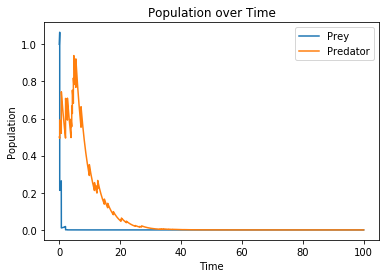

In [190]:
plot_population(model(event_func = event))